<a href="https://colab.research.google.com/github/stephenbeckr/time-series-class/blob/main/Demos/TimeSeries_SpectralMethodsDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral methods for time series
Demos modified from several demos written by Will Kleiber 2018

4/6/2022, adding section on [**spectral leakage**](https://en.wikipedia.org/wiki/Spectral_leakage)

### Demo 1: spectral density of ARMA(1,1) process
For the simple case of an ARMA(1,1) process with parameters $\phi,\theta$, we have a closed-form expression for the spectral density:
$$
f(\lambda) = \frac{1}{2\pi}\frac{ 1 + \theta^2 + 2\theta\cos(\lambda) }{1+\phi^2 - 2\phi\cos(\lambda) }
$$

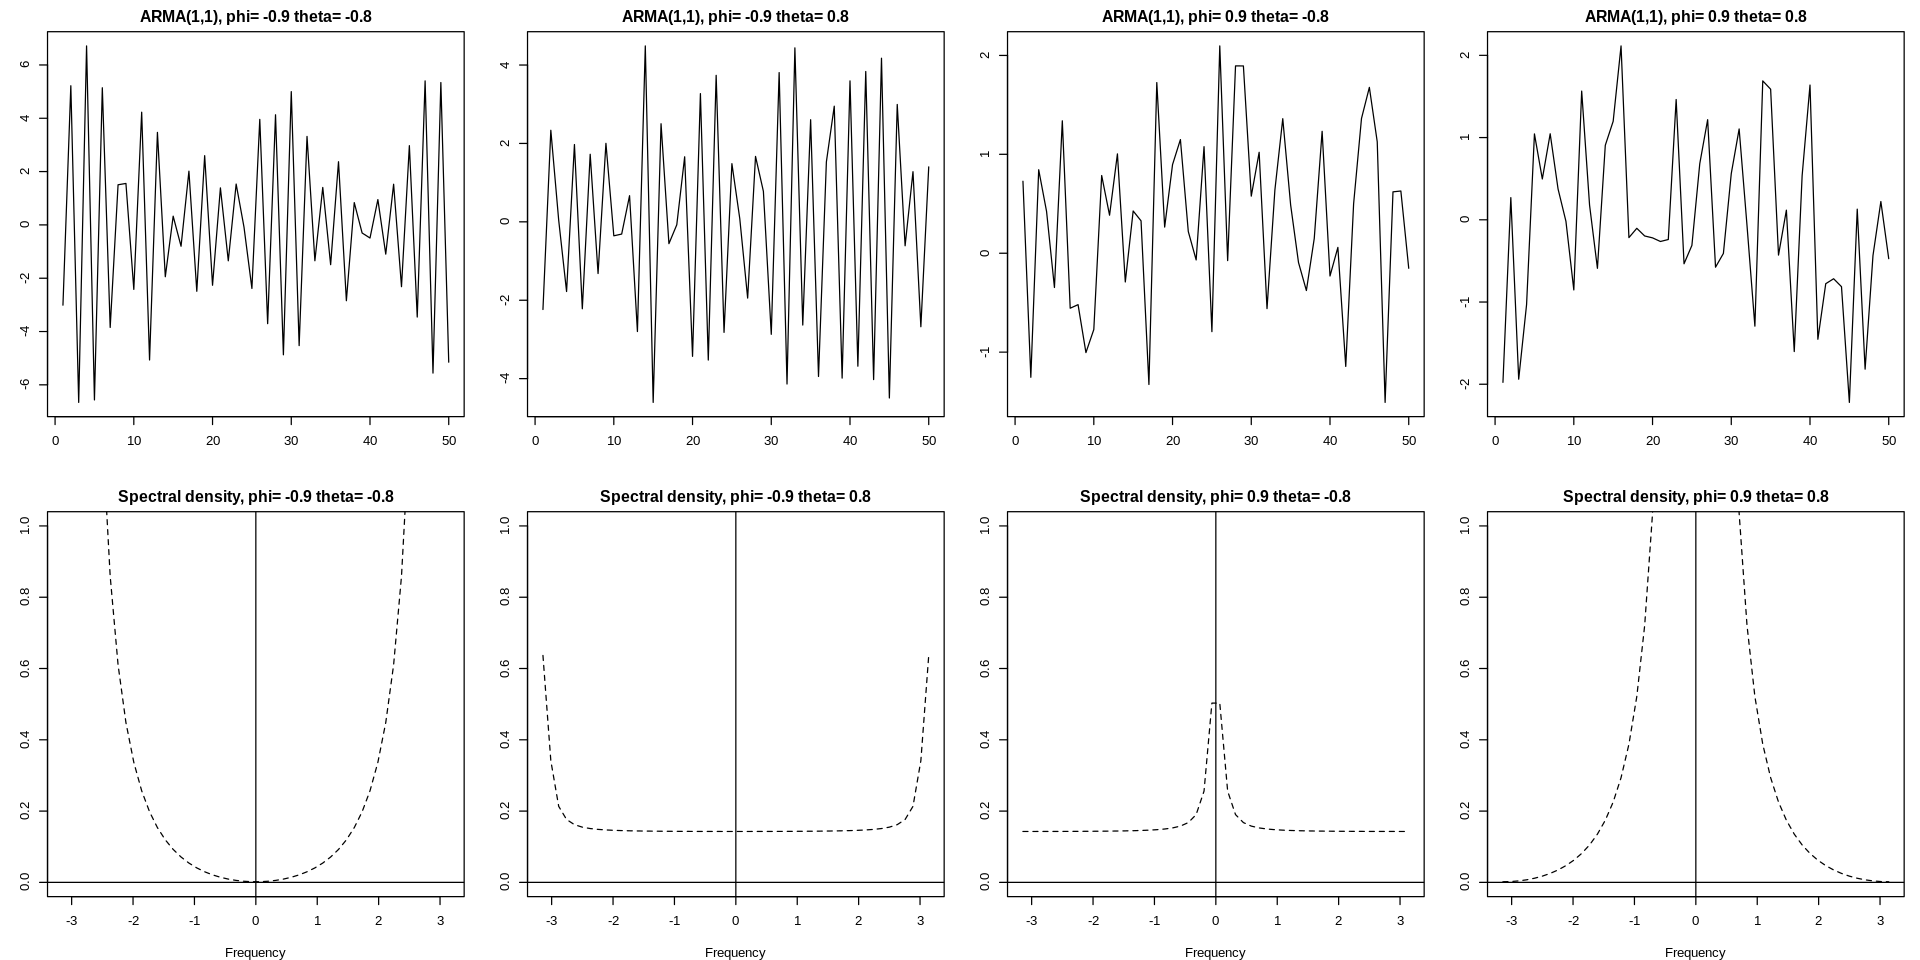

In [2]:
set.seed(1)
N     <- 50
freq  <- seq(-pi,pi,length.out=N)
phi   <- c(-0.9,-0.9,0.9,0.9)
theta <- c(-0.8,0.8,-0.8,0.8)
par(mfcol=c(2,4),mar=c(4,3,2,1)) # for plotting
options(repr.plot.width = 16, repr.plot.height=8)
for(i in 1:4){
  dat <- arima.sim(model=list(ar=phi[i],ma=theta[1]),n=N)
  #dat <- itsmr::sim(a=specify(ar=phi[i],ma=theta[i]),n=N)

  dens <- (1/(2*pi)) * (1 + theta[i]^2 + 2*theta[i]*cos(freq)) /
    (1 + phi[i]^2 - 2*phi[i]*cos(freq))

  plot(dat,xlab="",ylab="",type="l",
    main=paste("ARMA(1,1), phi=",phi[i],"theta=",theta[i]))
  plot(dens~freq,type="l",lty=2,xlab="Frequency",ylab="Density",ylim=c(0,1),
    main=paste("Spectral density, phi=",phi[i],"theta=",theta[i]))
  abline(h=0);abline(v=0)
}

### Periodogram

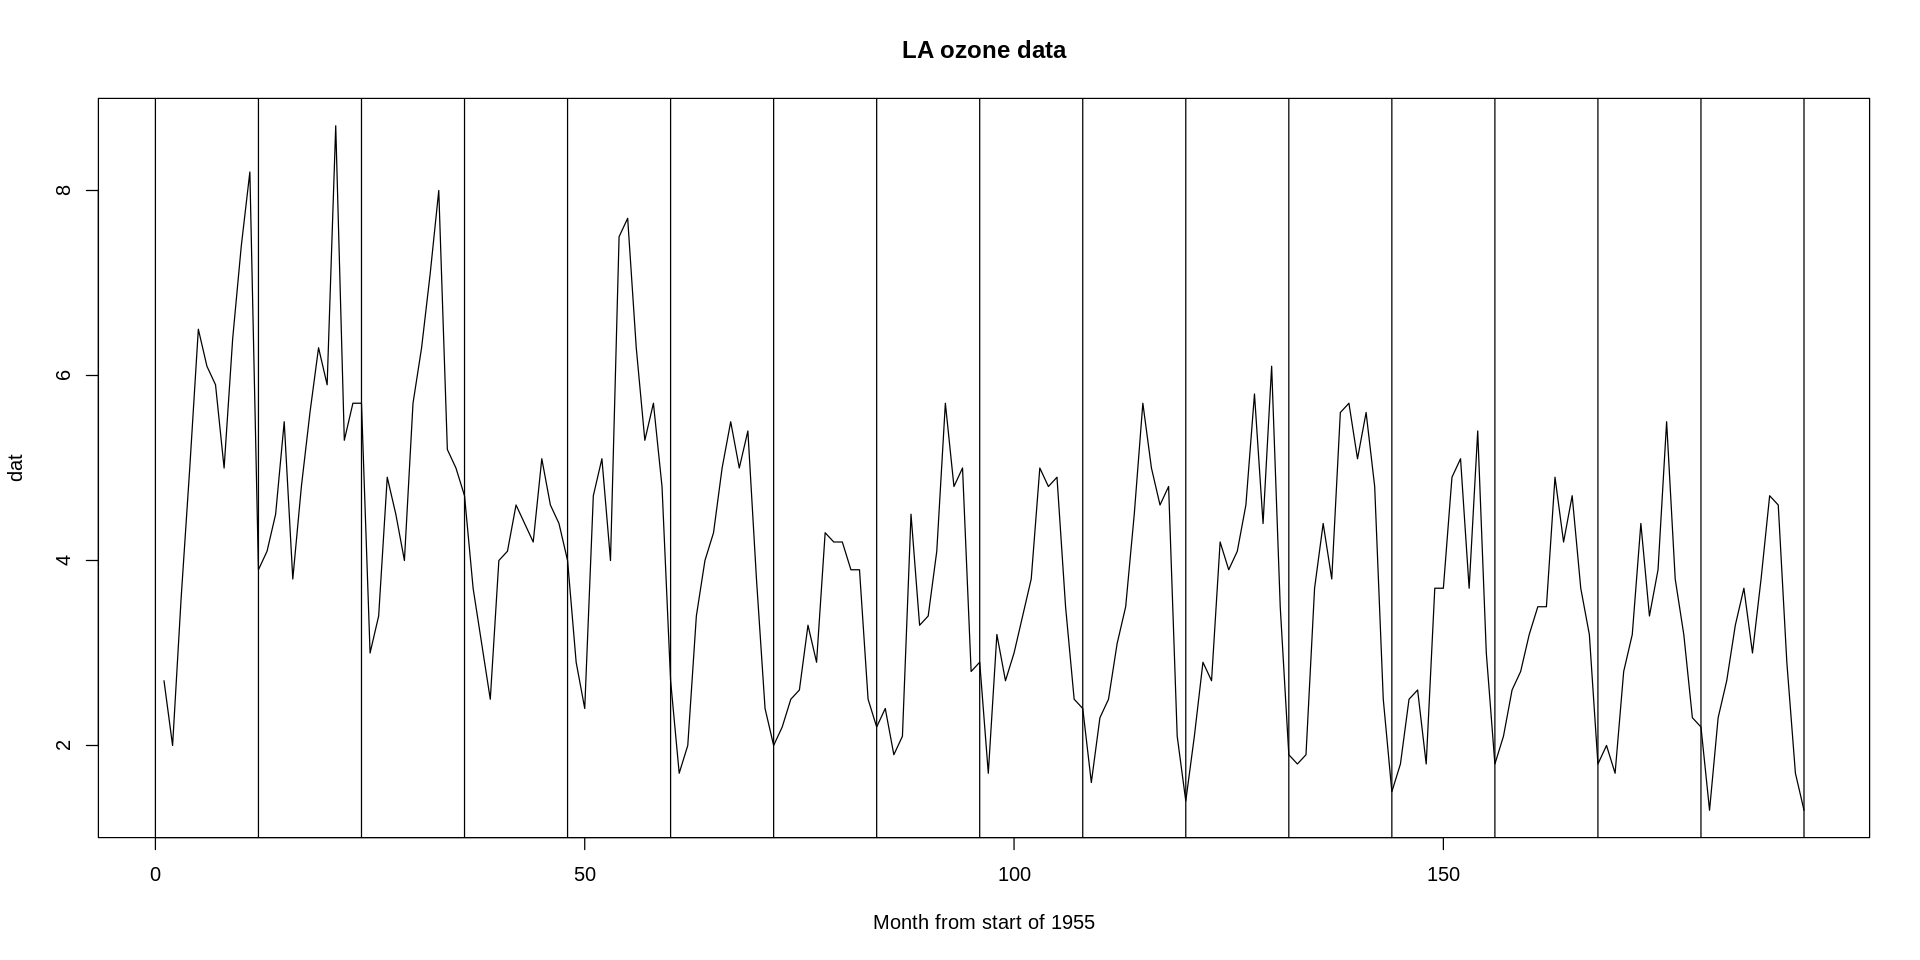

In [3]:
load(url("https://github.com/stephenbeckr/time-series-class/raw/main/Data/HW3data.RData")) # LA ozone data
dat <- dat.F[1:192];rm(dat.F)

plot(dat,type="l",main="LA ozone data",xlab="Month from start of 1955")
for(i in 1:20){
  abline(v=(i-1)*12)
}

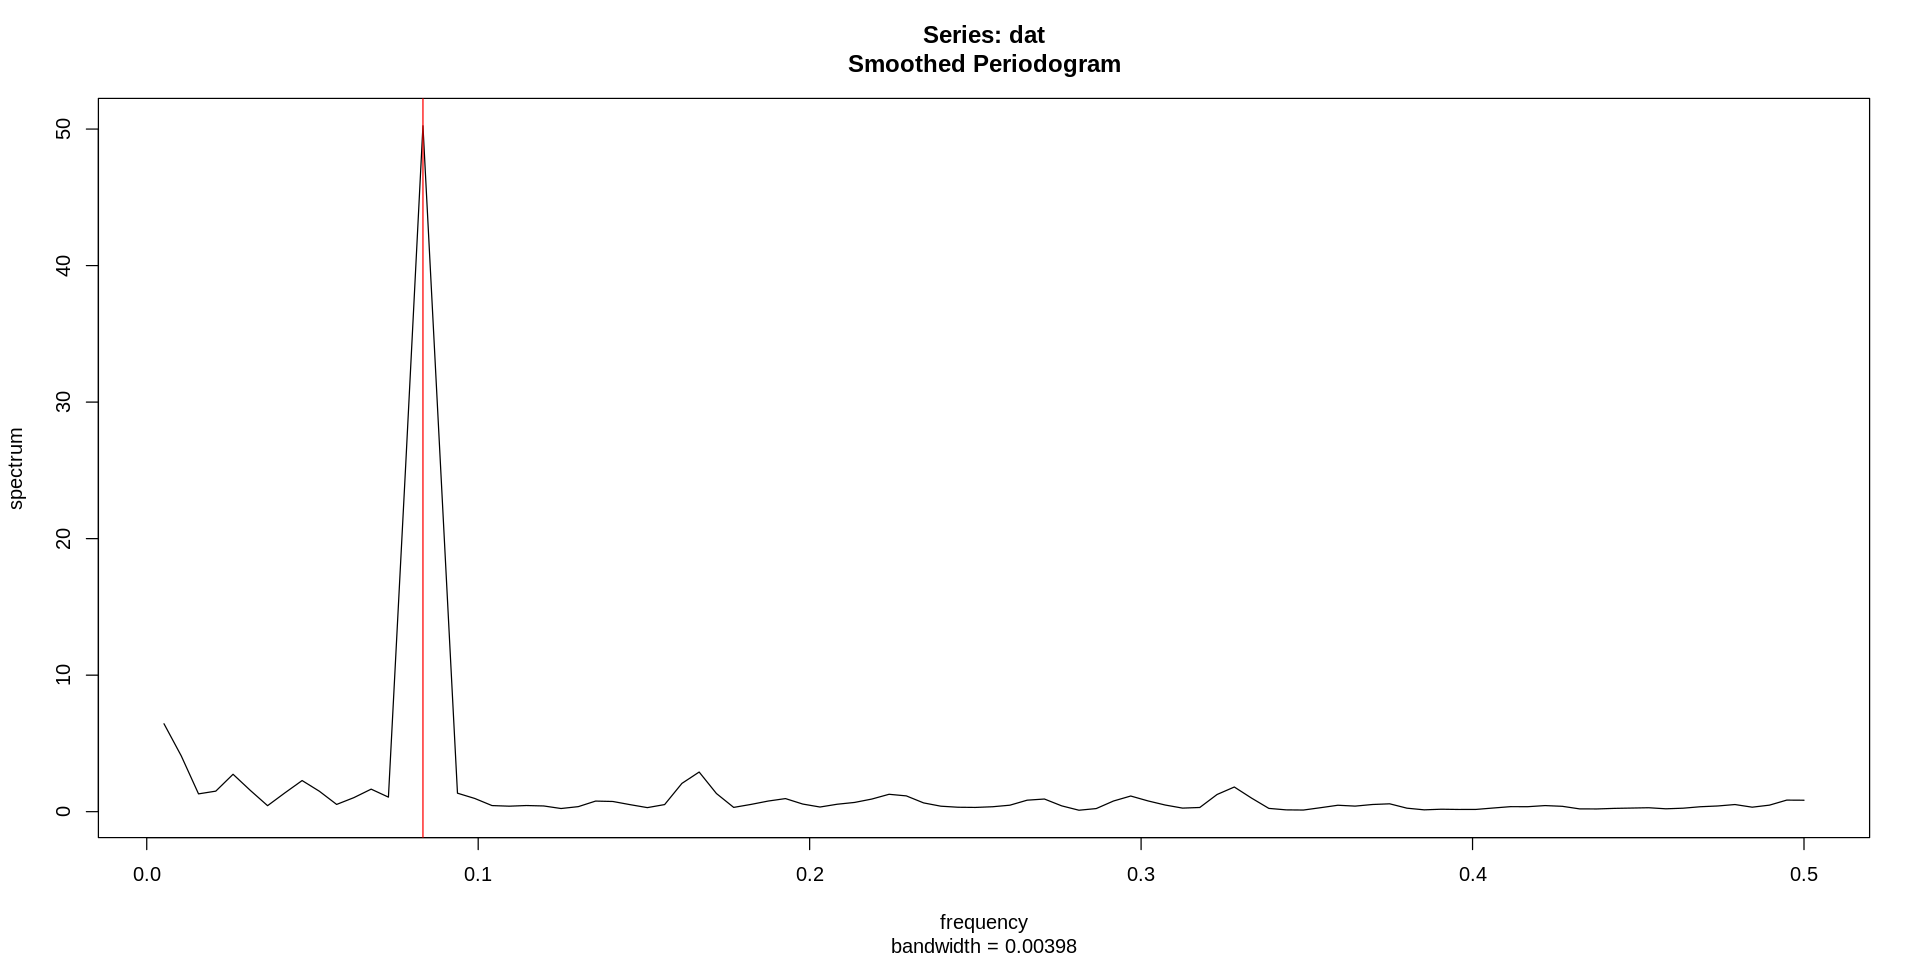

In [4]:
spec.pgram(dat,taper=0,log="no",spans=3)
abline(v=1/12,col="red") # approximately periodic once every 12 months

## Spectral leakage

Suppose we have a signal like
$$
X_t = \cos(\omega_1 t ) + .05\cos(\omega_2 t ) + .2 Z_t, \quad Z_t\sim\text{WN}(0,1)
$$

This "obviously" has frequency components at $\omega_1$ and $\omega_2$ (and no where else)

In our first example below, the frequency components are "**on-grid**", meaning they are an **integer** multiple of $2\pi/n$ where $n$ is the length of the time series

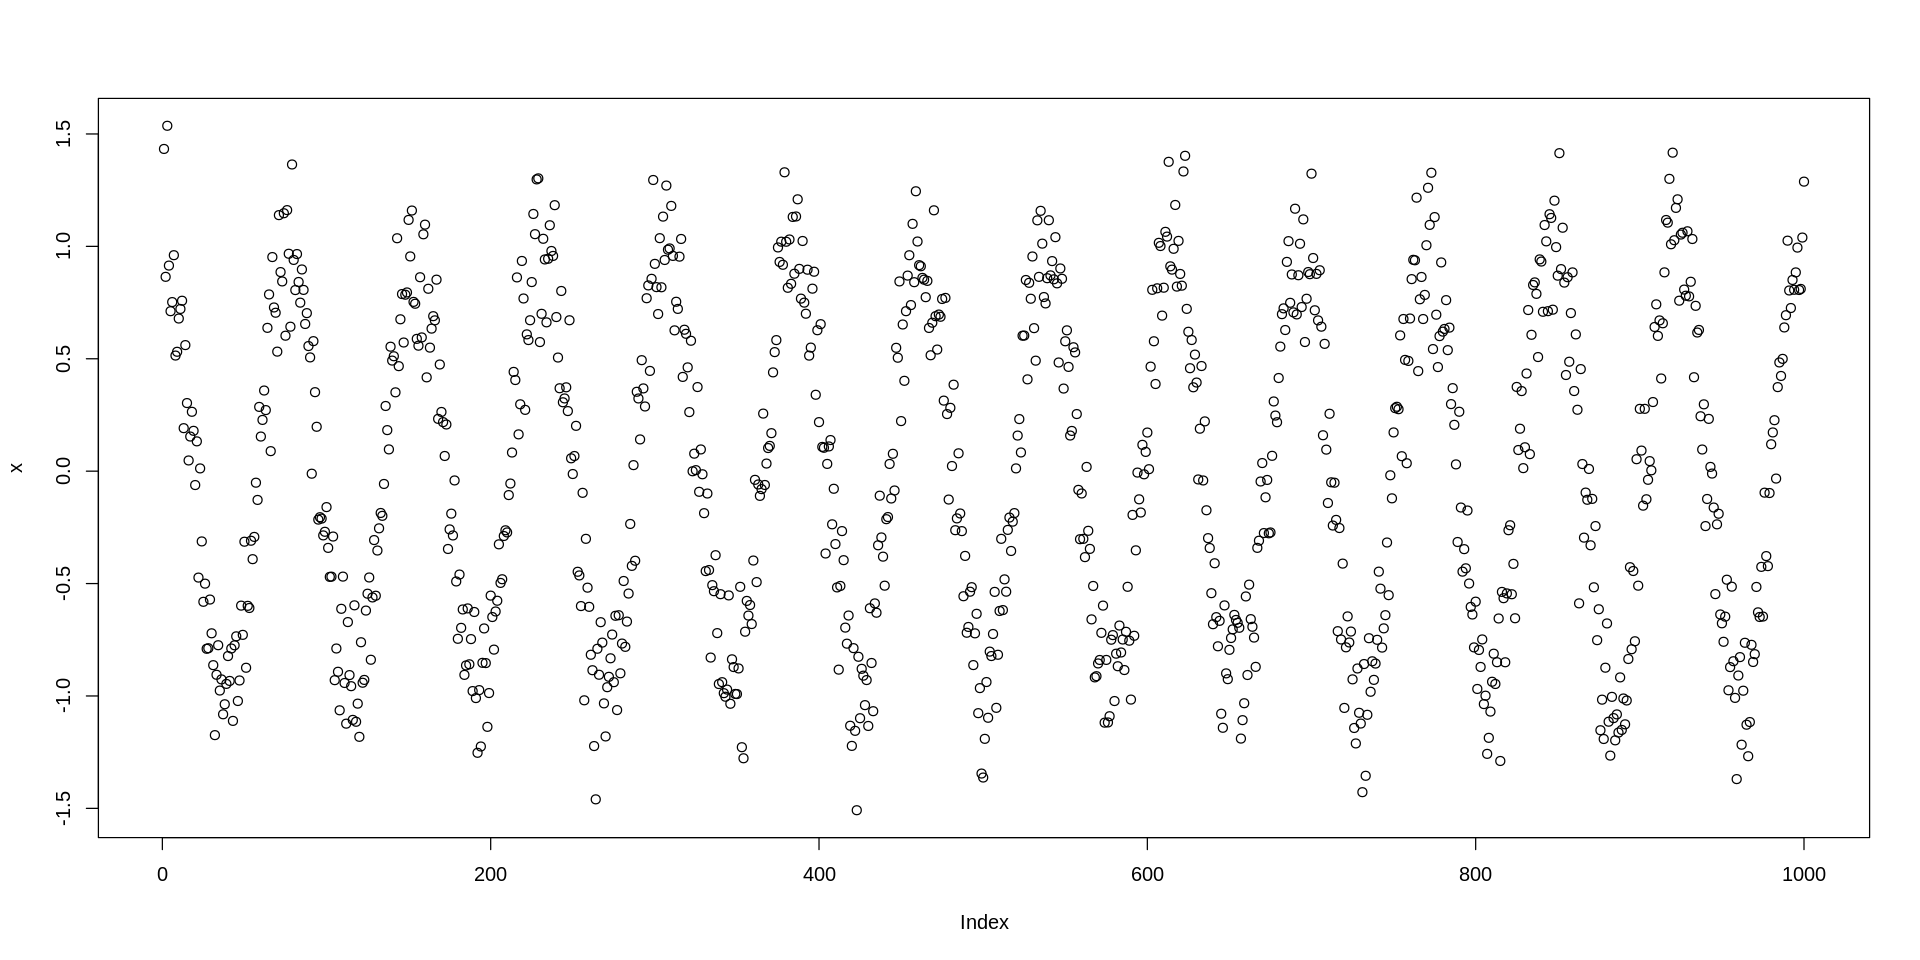

In [3]:
n <- 1000

omega1 <- 2*pi*13/1000
omega2 <- 2*pi*101/1000

x <- .2*rnorm(n) + cos(omega1*(1:n)) + .05*cos(omega2*(1:n))

options(repr.plot.width = 16, repr.plot.height=8)
plot(x)

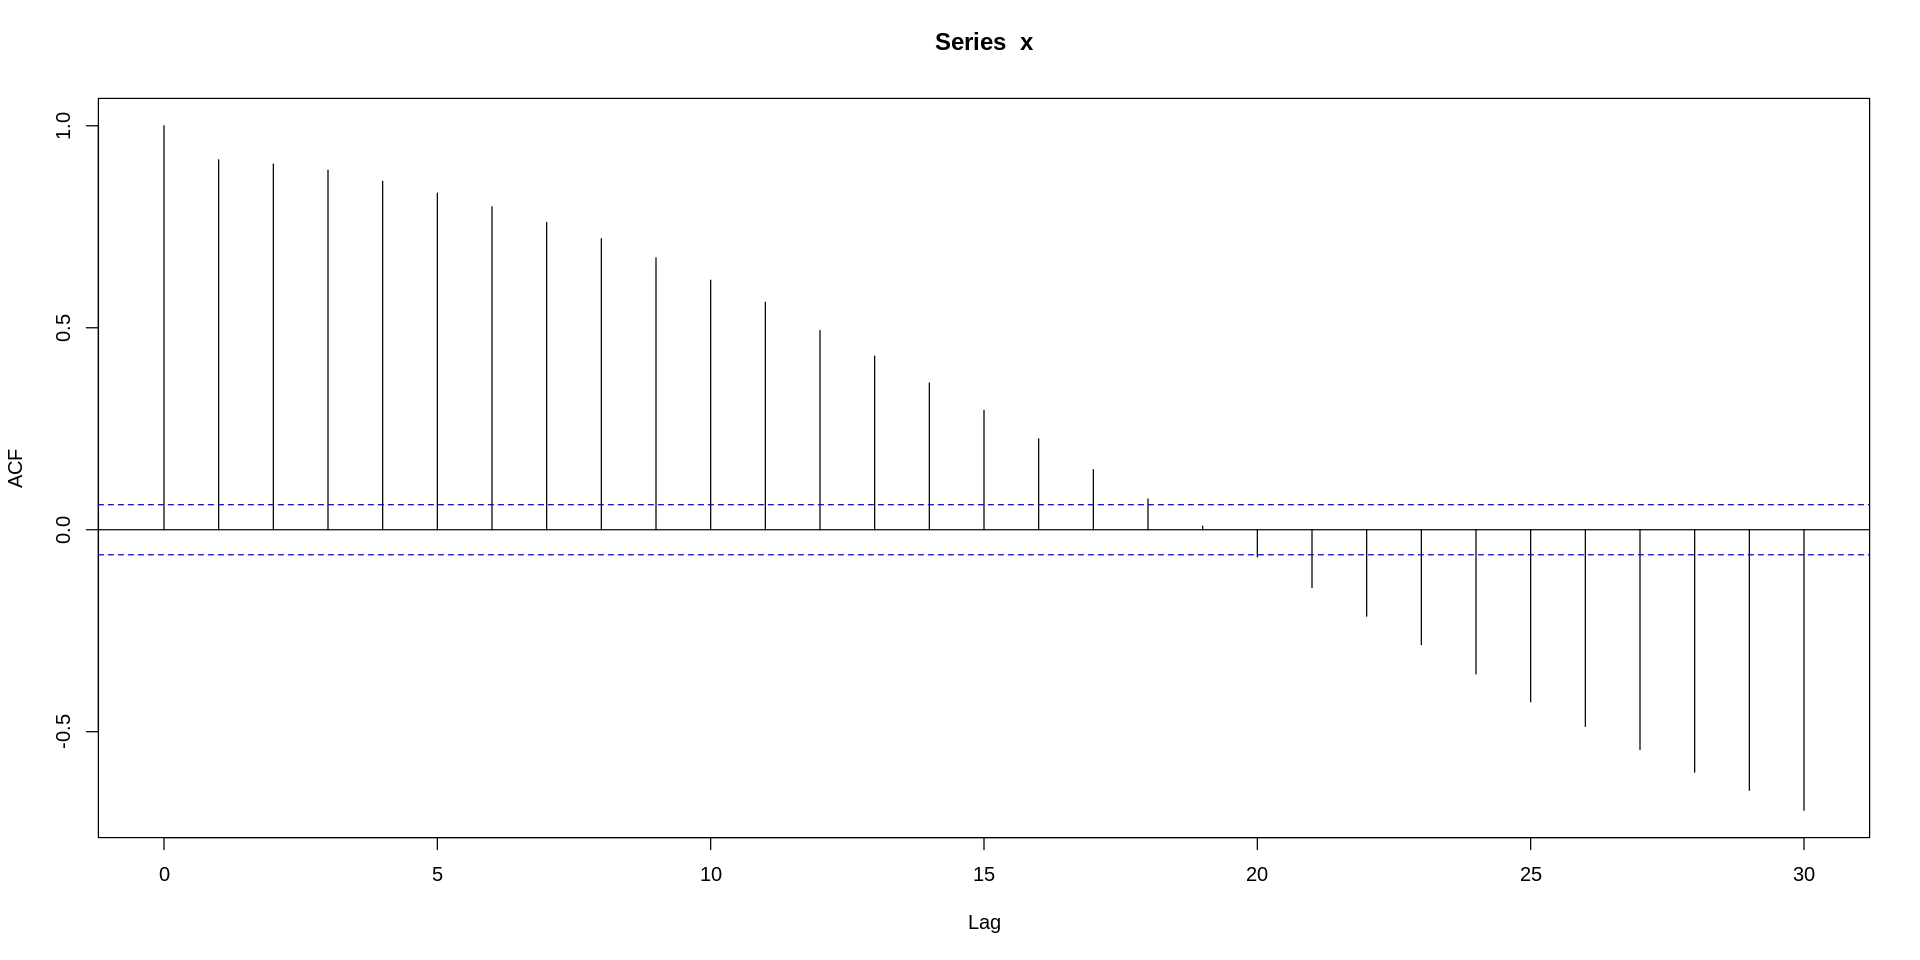

In [4]:
acf(x)

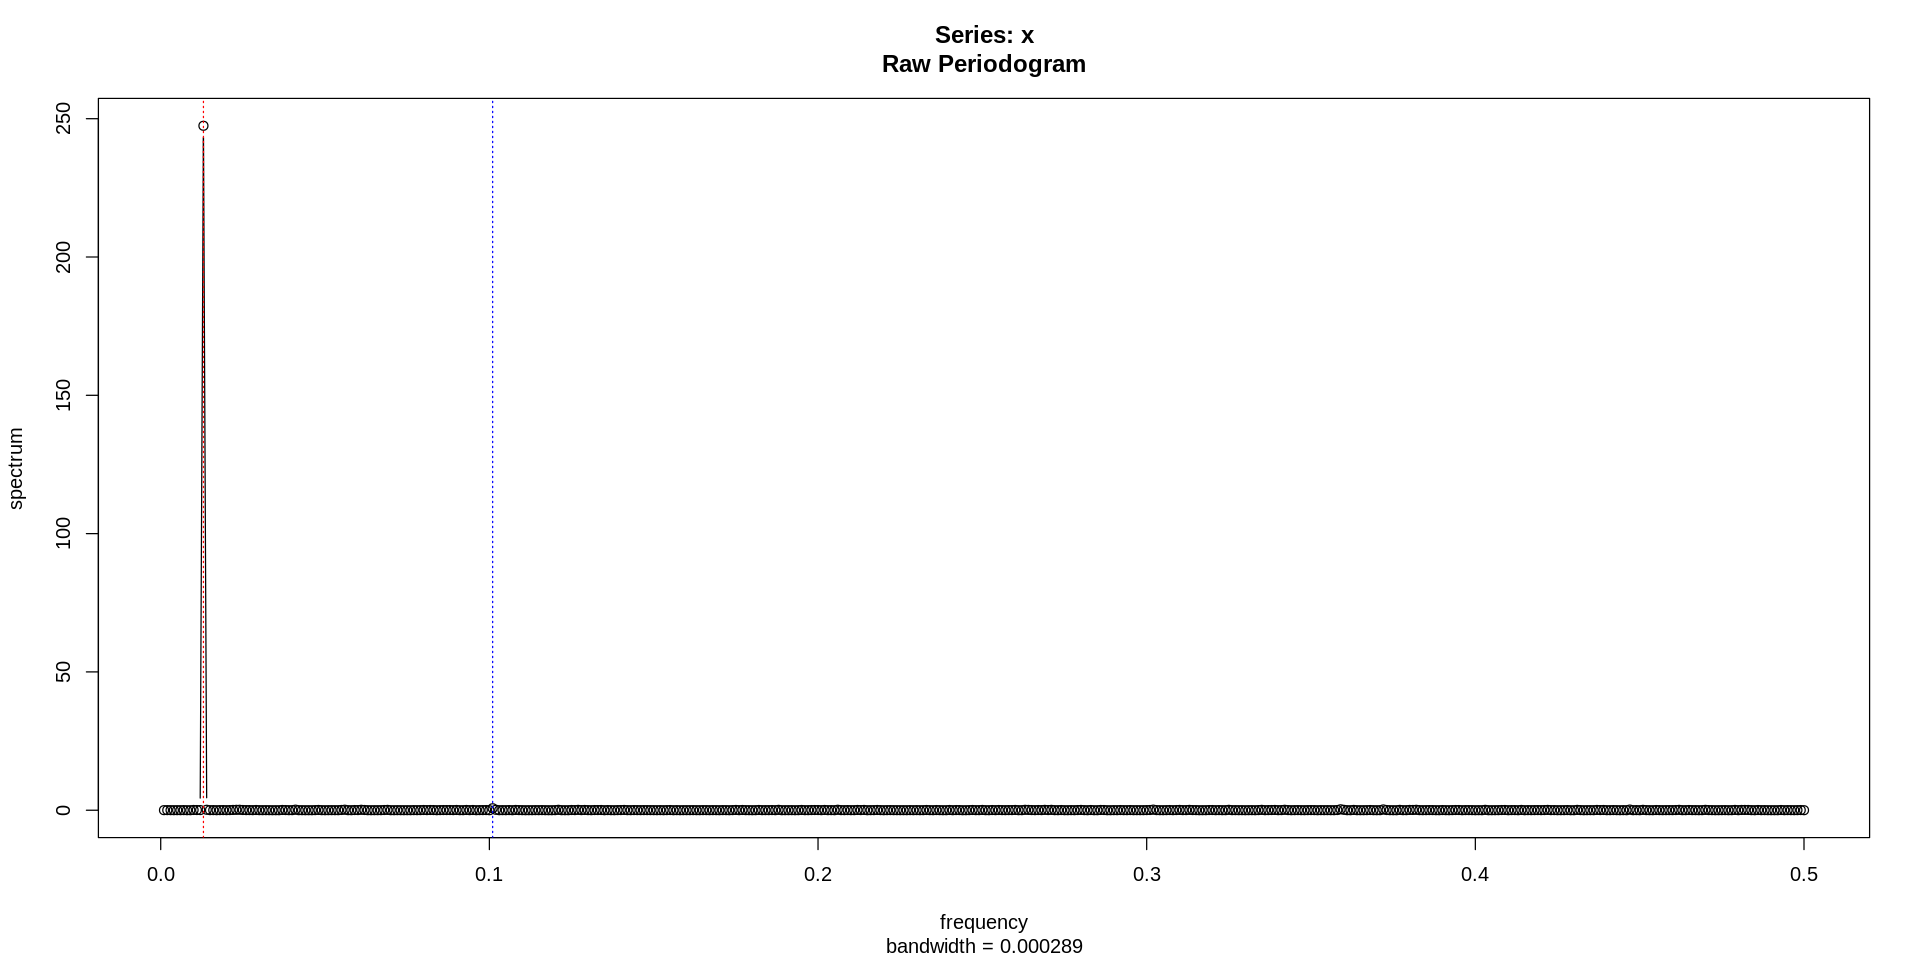

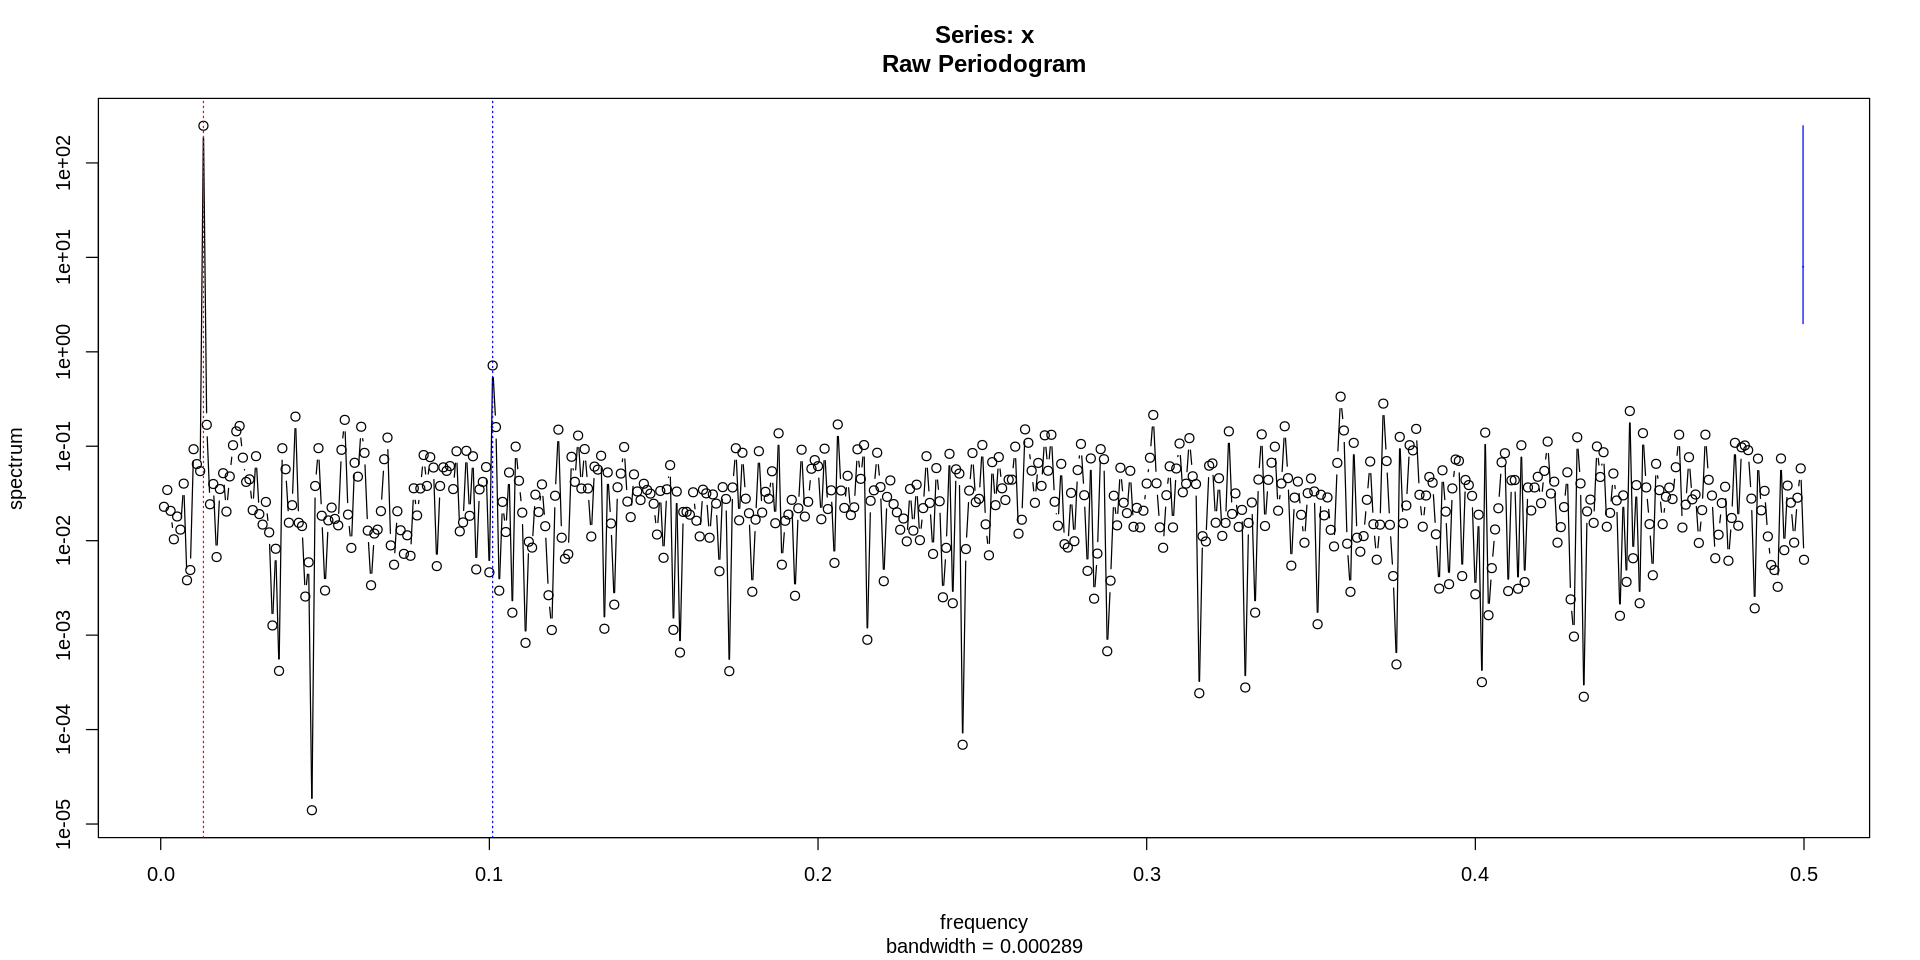

In [8]:
# And plot the periodogram
pg <- spec.pgram(x,taper=0,log="no",type='b',pch=1) # the type='b',pch=1 stuff is just for plotting
abline(v=omega1/(2*pi),lty='dotted',col="red")
abline(v=omega2/(2*pi),lty='dotted',col="blue")

# Same thing, but make the y-axis a log scale
pg <- spec.pgram(x,taper=0,log="yes",type='b',pch=1)
abline(v=omega1/(2*pi),lty='dotted',col="red")
abline(v=omega2/(2*pi),lty='dotted',col="blue")

Now, let's (implicitly) change "$n$" by only looking at the first 950 values (rather than the old $n=1000$).  What happens?

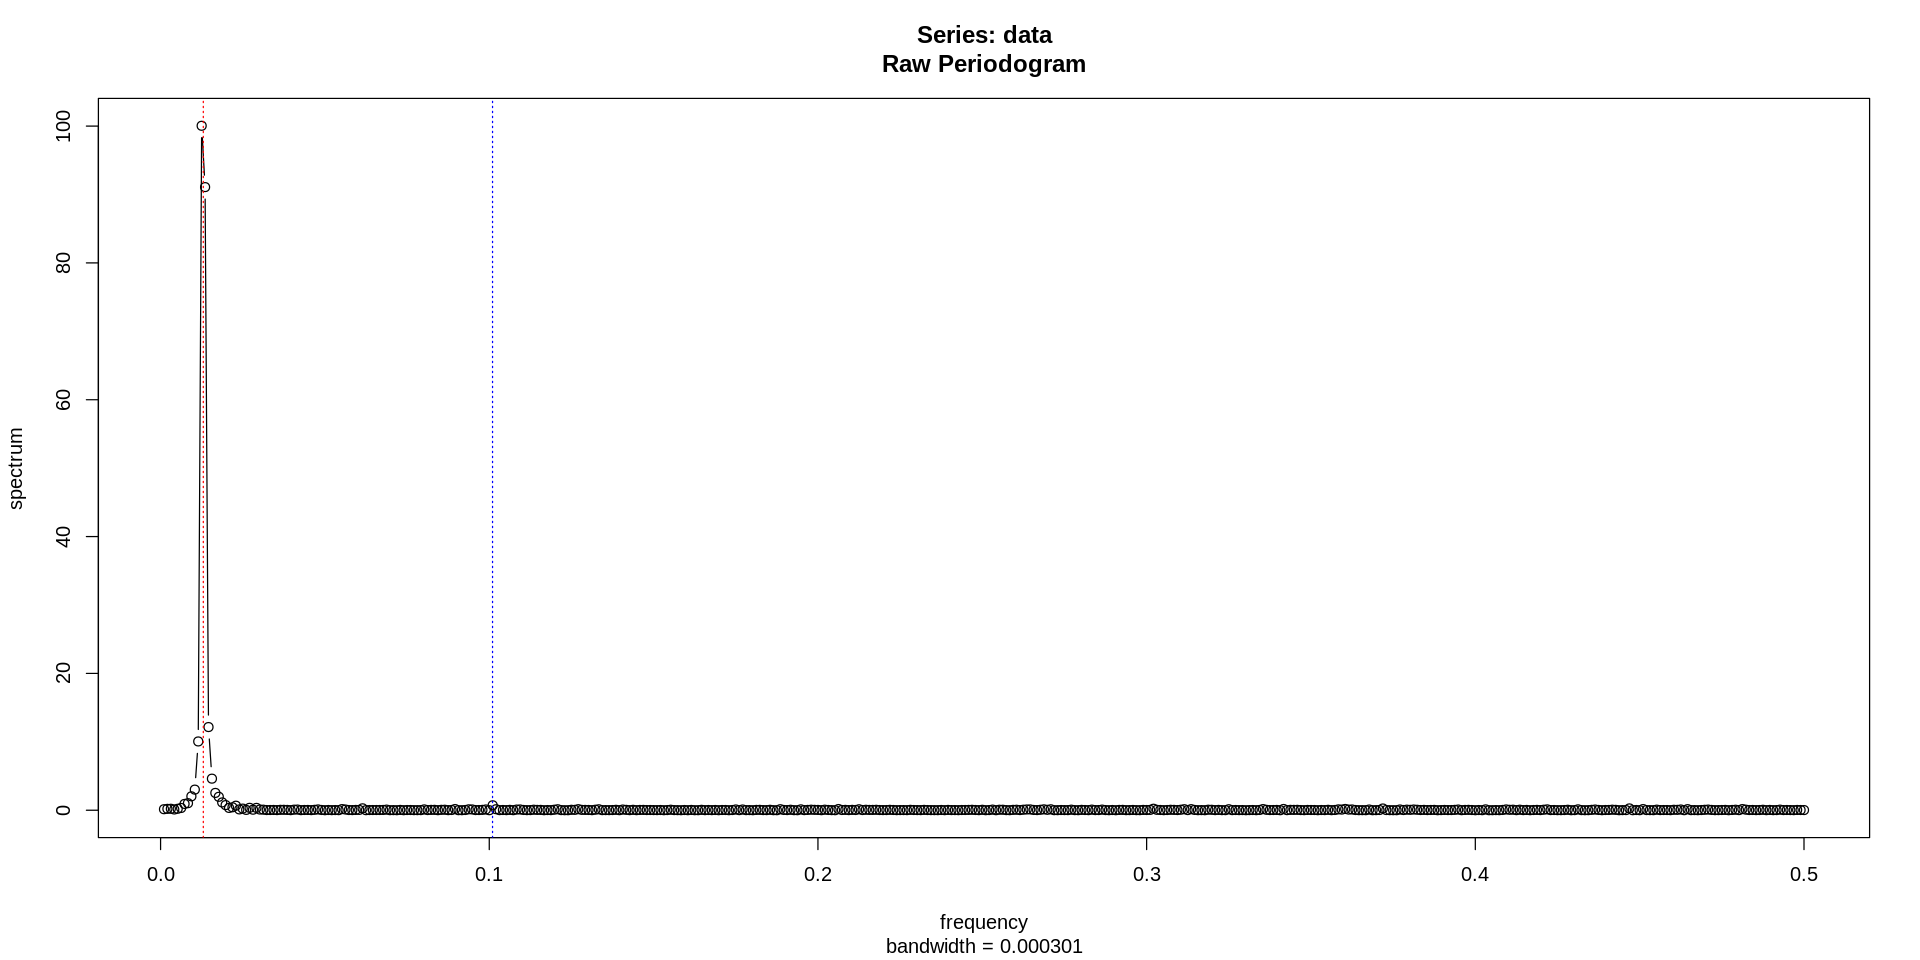

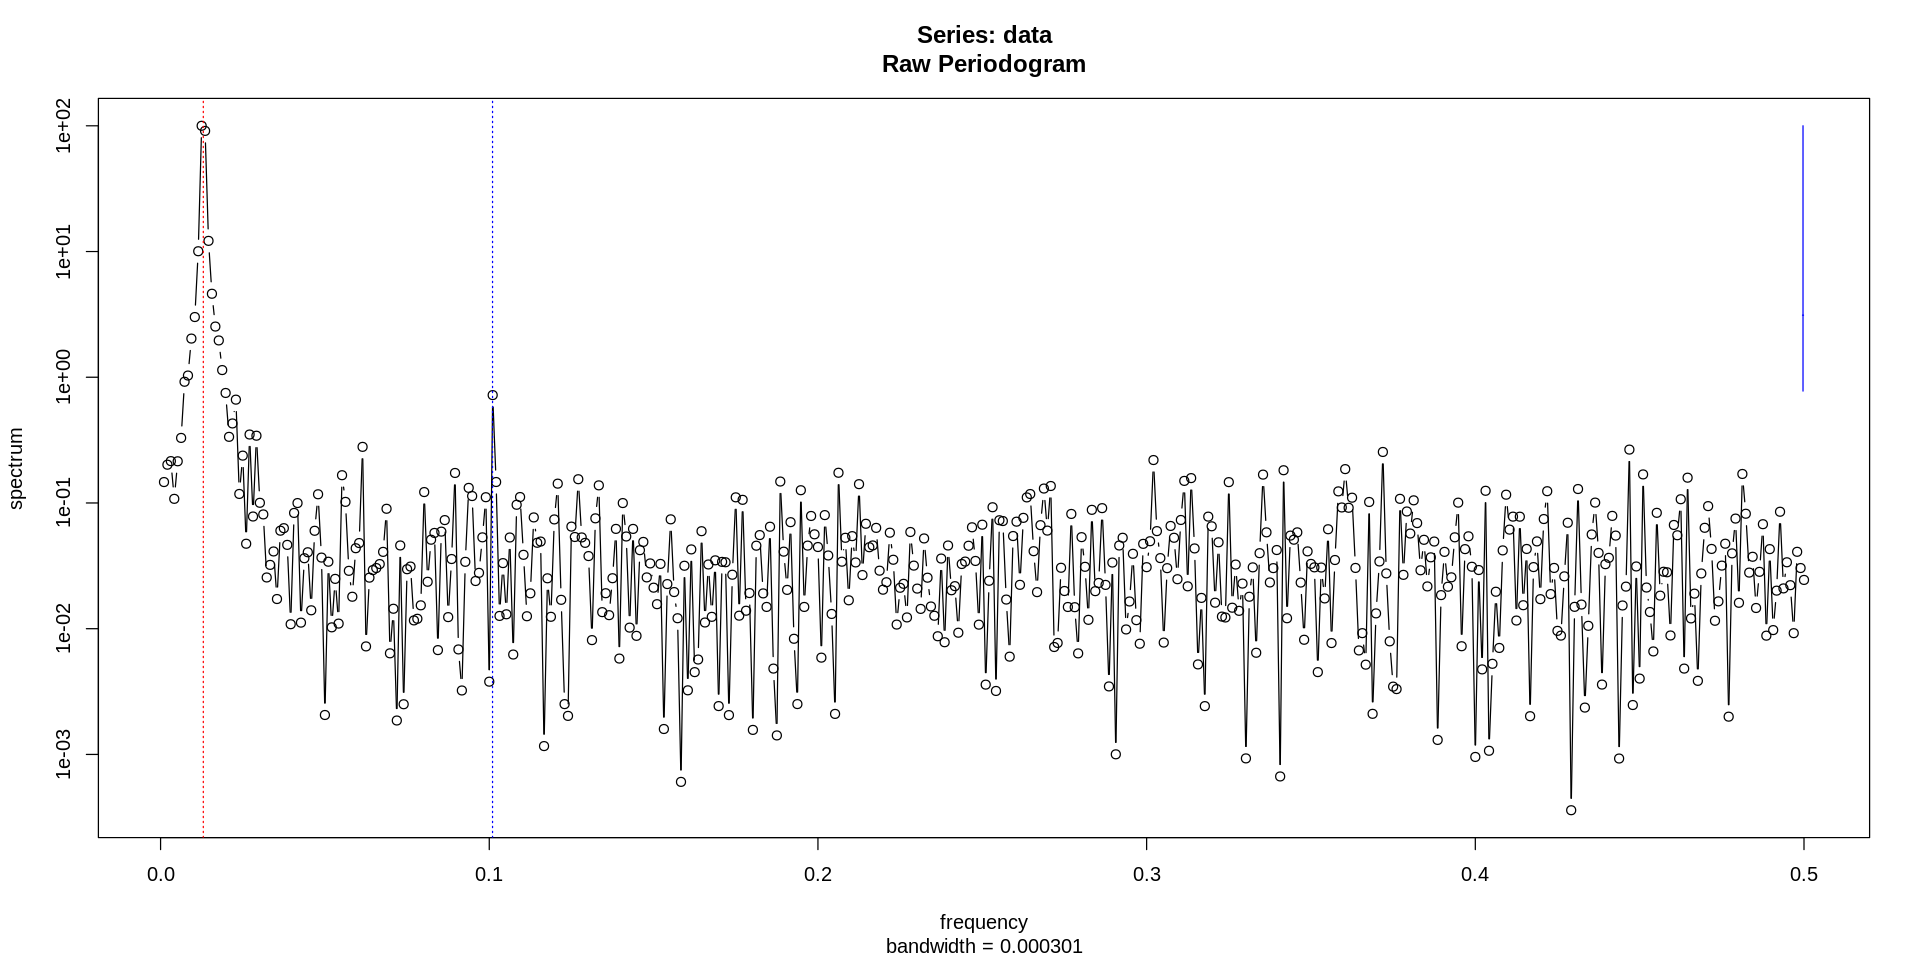

In [10]:
data <- x[1:950]

pg <- spec.pgram( data ,taper=0,log="no",type='b',pch=1)
abline(v=omega1/(2*pi),lty='dotted',col="red")
abline(v=omega2/(2*pi),lty='dotted',col="blue")

pg <- spec.pgram( data ,taper=0,log="yes",type='b',pch=1)
abline(v=omega1/(2*pi),lty='dotted',col="red")
abline(v=omega2/(2*pi),lty='dotted',col="blue")

We see that the peaks are more spread out!

We can somewhat fix the problem by windowing and averaging (the `taper` and `spans` commands in `spec.pgram`).  See more at wikipedia's [spectral leakage page](https://en.wikipedia.org/wiki/Spectral_leakage) and [window function](https://en.wikipedia.org/wiki/Window_function) for a short intro to windowing tradeoffs

With the windowing, the small peak for $\omega_2$ is now easier to see (we've averaged the nearby random coefficients)

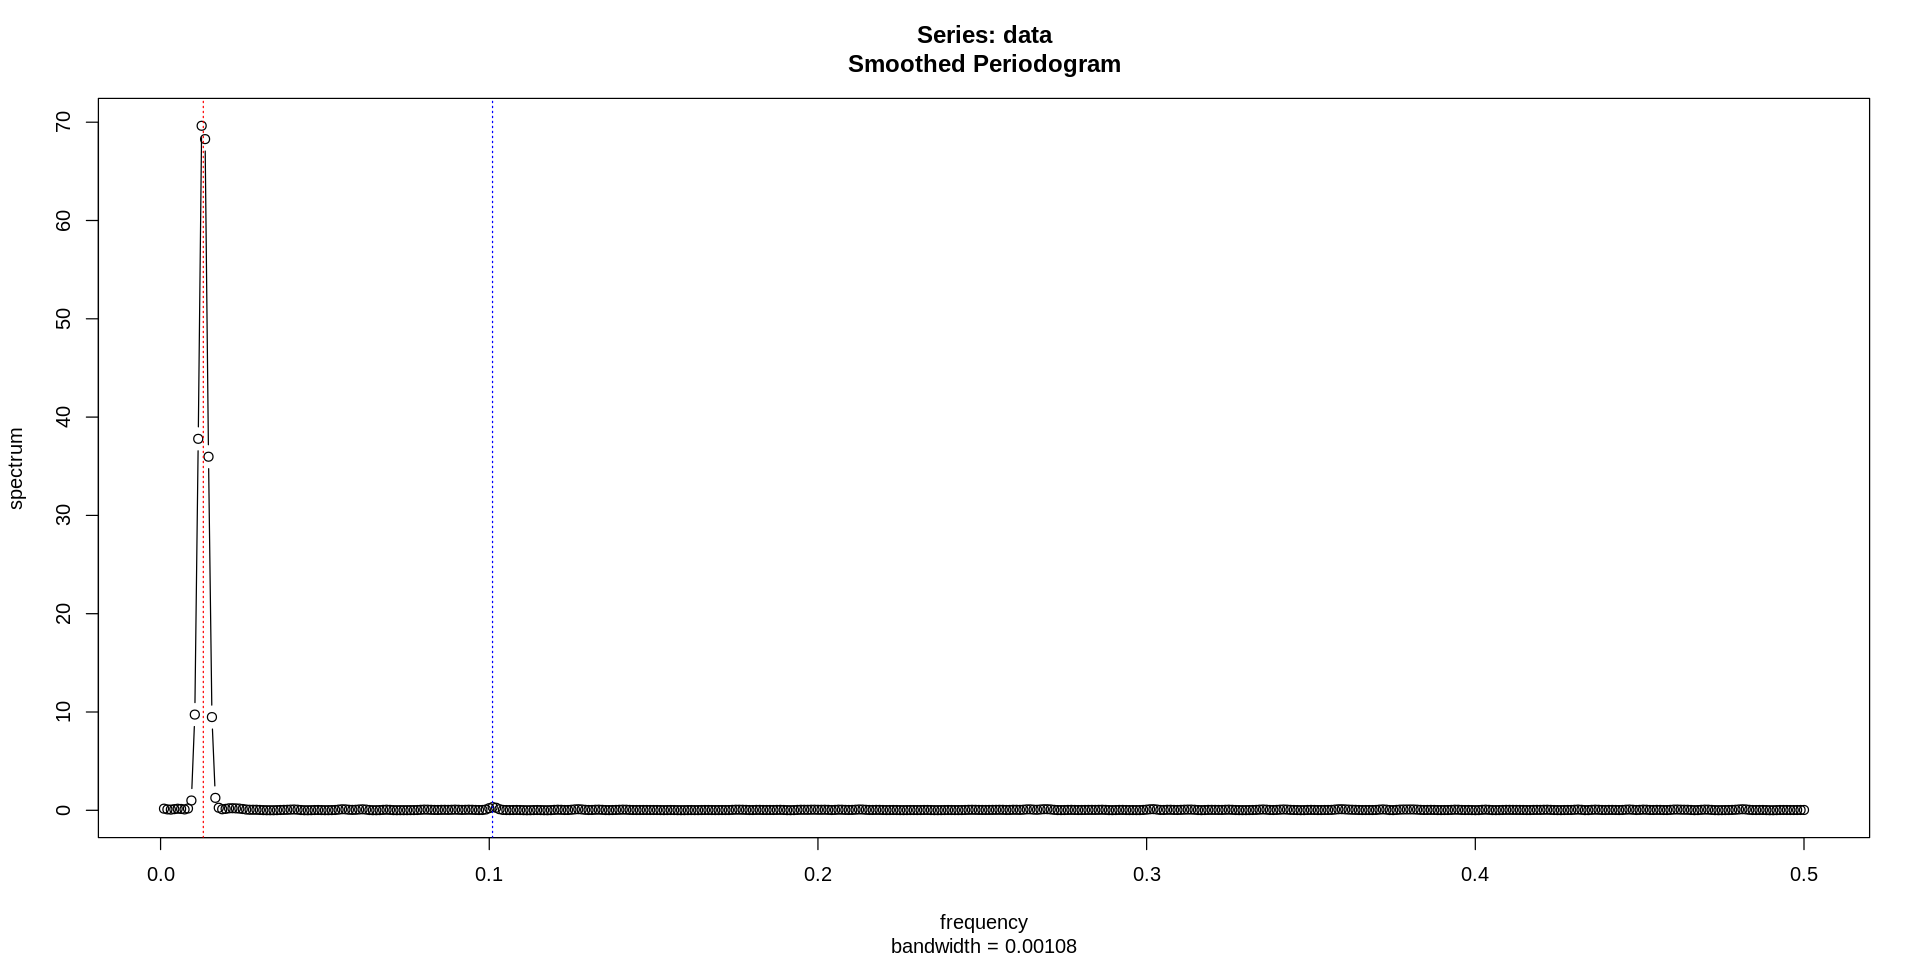

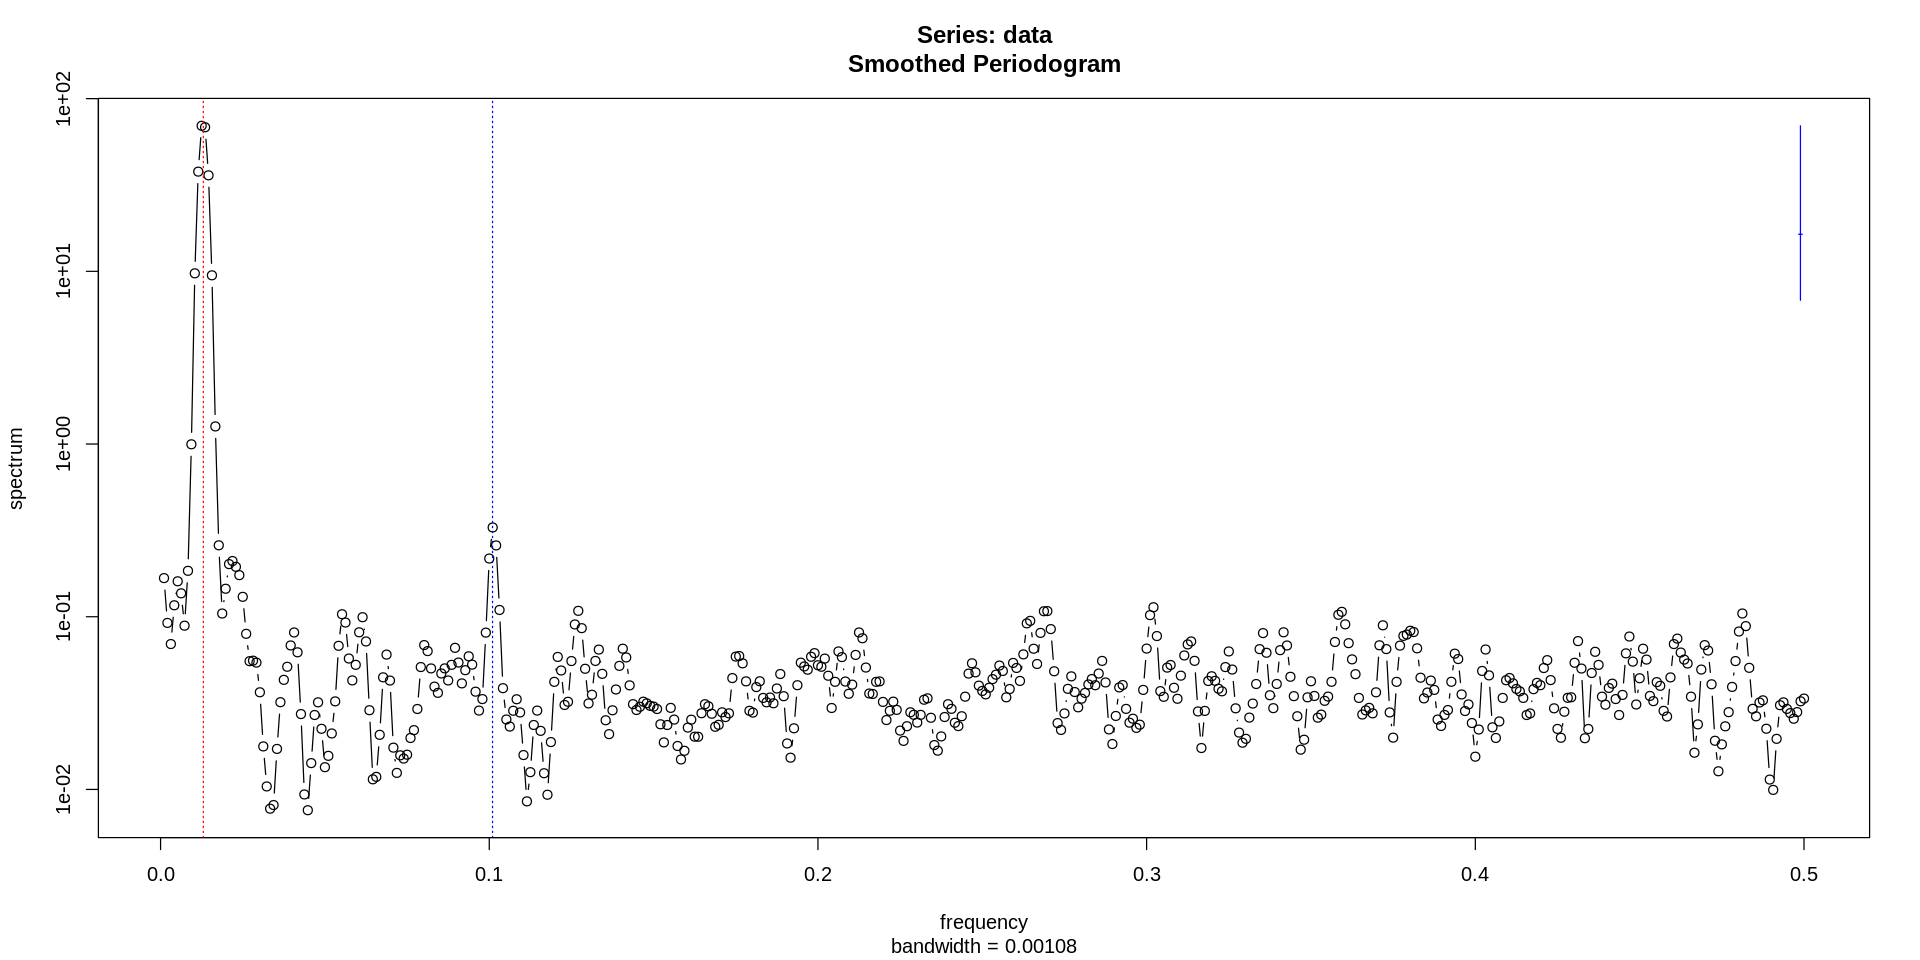

In [11]:
pg <- spec.pgram(data ,taper=.1,spans=c(3,3),log="no",type='b',pch=1)
abline(v=omega1/(2*pi),lty='dotted',col="red")
abline(v=omega2/(2*pi),lty='dotted',col="blue")

# Same thing, now log scale
pg <- spec.pgram(data ,taper=.1,spans=c(3,3),log="yes",type='b',pch=1)
abline(v=omega1/(2*pi),lty='dotted',col="red")
abline(v=omega2/(2*pi),lty='dotted',col="blue")